In [1]:
###### linear regression with regularization:- batch gradient descent #######

from google.colab import files
uploaded = files.upload()

Saving test_feature_matrix.xlsx to test_feature_matrix.xlsx
Saving test_output.xlsx to test_output.xlsx
Saving training_feature_matrix.xlsx to training_feature_matrix.xlsx
Saving training_output.xlsx to training_output.xlsx


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

In [4]:
X_train = pd.read_excel('training_feature_matrix.xlsx', header = None)
Y_train = pd.read_excel('training_output.xlsx', header = None)
X_test = pd.read_excel('test_feature_matrix.xlsx', header = None)
Y_test = pd.read_excel('test_output.xlsx', header = None)

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(245, 2)
(245, 1)
(104, 2)
(104, 1)


In [6]:
def normalize(X):
  res = (X - X.min())/(X.max() - X.min())  #this applies to every column
  return res

In [7]:
#function to compute cost
def compute_cost(Y_pred, Y, w1, w2, reg):
  cost1 = 0
  m = Y.shape[0]
  for i in range(len(Y)):
    cost1 = cost1 + (Y_pred[i] - Y.iloc[i,0])**2
  
  cost_val = cost1 + reg*(w1**2 + w2**2)
  return (0.5*cost_val)/m

In [8]:
def update_param(X, Y, w1, w2, b, reg, learning_rate = 0.01):
  Y_pred = [0 for i in range(len(X))]
  dw1 = 0
  dw2 = 0
  db = 0
  m = X.shape[0]

  for i in range(len(X)):
    Y_pred[i] = X.iloc[i,0]*w1 + X.iloc[i,1]*w2 + b
    db = db + (Y_pred[i] - Y.iloc[i,0])
    dw1 = dw1 + (Y_pred[i] - Y.iloc[i,0])* X.iloc[i,0]
    dw2 = dw2 + (Y_pred[i] - Y.iloc[i,0])* X.iloc[i,1]
  
  cost = compute_cost(Y_pred, Y, w1, w2, reg)

  w1 = w1*(1-(learning_rate*reg)/m) - learning_rate * (dw1/m)
  w2 = w2*(1-(learning_rate*reg)/m) - learning_rate * (dw2/m)
  b = b - learning_rate * (db/m)

  return w1, w2, b, cost

In [9]:
def create_mini_batches(X, Y, rand_state, batch_size = 64):
    mini_batches = []
    m = X.shape[0]
    X_shuffled = X.sample(frac = 1, random_state = rand_state).reset_index(drop = True)
    Y_shuffled = Y.sample(frac = 1, random_state = rand_state).reset_index(drop = True)
    num_mini_batch = m // batch_size
    
    for i in range (num_mini_batch):
        mini_X = X_shuffled[i*batch_size:(i+1)*batch_size]
        mini_Y = Y_shuffled[i*batch_size:(i+1)*batch_size]
        mini_batches.append((mini_X, mini_Y))
    
    if(m % batch_size != 0):
        i = i+1
        mini_X = X_shuffled[i*batch_size:]
        mini_Y = Y_shuffled[i*batch_size:]
        mini_batches.append((mini_X, mini_Y))
        
    return mini_batches

In [46]:
def lin_reg_regularization(X, Y, reg, batch_size = 32, learning_rate = 0.01, epochs = 100):
  cost_list = [0 for i in range(epochs)]
  w1_list = [0 for i in range(epochs)]
  w2_list = [0 for i in range(epochs)]
  
  w1 = 0.5
  w2 = -0.5
  b = 0.0

  X_norm = normalize(X)
  Y_norm = normalize(Y)

  m = X_norm.shape[0]
  num_mini_batches = math.ceil(m/batch_size)

  for i in range(epochs):
    #print("i is: ",i)
    mini_batch = create_mini_batches(X_norm, Y_norm, i, batch_size)
    cost_val = 0

    for j in range(num_mini_batches):
      #print("j is: ", j)
      X_mini_batch = mini_batch[j][0]
      Y_mini_batch = mini_batch[j][1]

      w1,w2,b,cost = update_param(X_mini_batch, Y_mini_batch, w1, w2, b, reg, learning_rate)
      cost_val = cost_val + cost

    cost_list[i] = cost_val
    w1_list[i] = w1
    w2_list[i] = w2

  return w1, w2, b, cost_list, w1_list, w2_list

In [47]:
#### here batch size is all samples in a training set #####
#### BATCH GRADIENT DESCENT ######
epochs = 5000
m = X_train.shape[0]
regularization_param = 0.2
w1_f, w2_f, b_f, costl, w1l, w2l = lin_reg_regularization(X_train, Y_train, regularization_param, batch_size = m, learning_rate = 0.01, epochs = epochs)

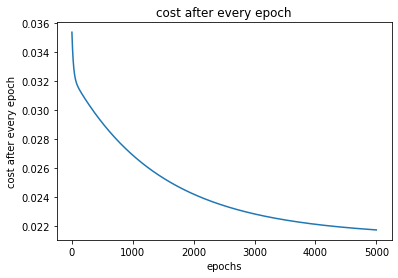

In [48]:
epoch_list = list(range(epochs))
plt.plot(epoch_list, costl)
plt.title('cost after every epoch')
plt.xlabel('epochs')
plt.ylabel('cost after every epoch')
plt.show()

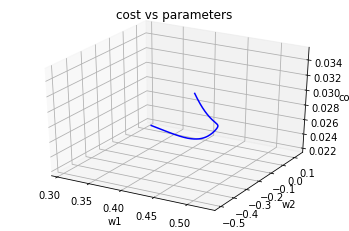

In [49]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(w1l,w2l,costl,'blue')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('cost')
ax.set_title('cost vs parameters')
#fig.show()
plt.show()

In [50]:
print("w1 is: ", w1_f)
print("w2 is: ", w2_f)
print("b is: ", b_f)

w1 is:  0.3066398109377051
w2 is:  0.12568863079934775
b is:  0.0049097771340098385


In [29]:
# predict output values
def predict(test_data, w1_final, w2_final, b_final):
    Y_pred = [0 for i in range(len(test_data))]
    for i in range(len(test_data)):
      Y_pred[i] = test_data.iloc[i,0]*w1_final + test_data.iloc[i,1]*w2_final + b_final
    return Y_pred

In [30]:
min_Y = Y_test.min()
max_Y = Y_test.max()
def denormalize(Y_predict, min_val, max_val):
  for i in range(len(Y_predict)):
    Y_out = Y_predict*(max_val-min_val) + min_val
  return Y_out

In [31]:
# mean square error
def mean_sqr_error(Y_pred, Y_test):
  error = (Y_test-Y_pred)**2
  mean_error = float(np.mean(error))
  return mean_error

In [51]:
X_test_norm = normalize(X_test)
Y_predicted = pd.DataFrame(predict(X_test_norm, w1_f, w2_f, b_f))
Y_output = denormalize(Y_predicted, min_Y, max_Y)

In [52]:
mean_sq_error = mean_sqr_error(Y_output,Y_test)
print("mean square error is: ", mean_sq_error)

mean square error is:  6.969084373346041


In [64]:
###### batch size is 1, every sample is a new batch ######
###### STOCHASTIC GRADIENT DESCENT #######

epochs1 = 100
regularization_param1 = 0.2
w1_f1, w2_f1, b_f1, costl1, w1l1, w2l1 = lin_reg_regularization(X_train, Y_train, regularization_param1, batch_size = 1, learning_rate = 0.01, epochs = epochs1)

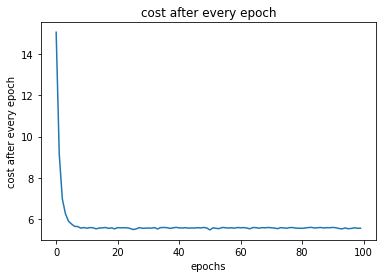

In [65]:
epoch_list1 = list(range(epochs1))
plt.plot(epoch_list1, costl1)
plt.title('cost after every epoch')
plt.xlabel('epochs')
plt.ylabel('cost after every epoch')
plt.show()

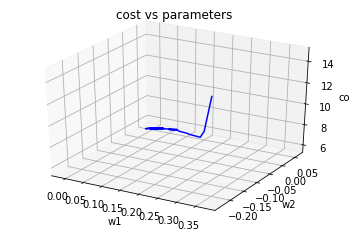

In [66]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(w1l1,w2l1,costl1,'blue')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('cost')
ax.set_title('cost vs parameters')
#fig.show()
plt.show()

In [67]:
print("w1 is: ", w1_f1)
print("w2 is: ", w2_f1)
print("b is: ", b_f1)

w1 is:  0.016032214162744196
w2 is:  0.04967362910513751
b is:  0.3191094481748641


In [68]:
X_test_norm = normalize(X_test)
Y_predicted = pd.DataFrame(predict(X_test_norm, w1_f1, w2_f1, b_f1))
Y_output = denormalize(Y_predicted, min_Y, max_Y)

In [69]:
mean_sq_error = mean_sqr_error(Y_output,Y_test)
print("mean square error is: ", mean_sq_error)

mean square error is:  5.75949605306417


In [78]:
###### batch size now is: 1 < batch_size < m ########
###### MINI BATCH GRADIENT DESCENT #######

epochs2 = 2000
regularization_param2 = 1
batch = 16
w1_f2, w2_f2, b_f2, costl2, w1l2, w2l2 = lin_reg_regularization(X_train, Y_train, regularization_param2, batch_size = batch, learning_rate = 0.01, epochs = epochs2)

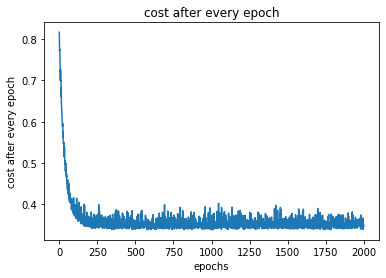

In [79]:
epoch_list2 = list(range(epochs2))
plt.plot(epoch_list2, costl2)
plt.title('cost after every epoch')
plt.xlabel('epochs')
plt.ylabel('cost after every epoch')
plt.show()

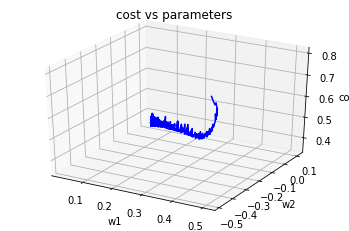

In [80]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(w1l2,w2l2,costl2,'blue')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('cost')
ax.set_title('cost vs parameters')
#fig.show()
plt.show()

In [81]:
print("w1 is: ", w1_f2)
print("w2 is: ", w2_f2)
print("b is: ", b_f2)

w1 is:  0.02825228859253907
w2 is:  0.10249389267415697
b is:  0.2801159314751198


In [82]:
X_test_norm = normalize(X_test)
Y_predicted = pd.DataFrame(predict(X_test_norm, w1_f2, w2_f2, b_f2))
Y_output = denormalize(Y_predicted, min_Y, max_Y)

In [83]:
mean_sq_error = mean_sqr_error(Y_output,Y_test)
print("mean square error is: ", mean_sq_error)

mean square error is:  5.970859952417961
